<a href="https://colab.research.google.com/github/Alisonia/Churn/blob/main/teleChurnAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the neccesary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [ ]:
#Loading the data into google Colab
from google.colab import files
uploaded=files.upload()

Saving teleChurn.csv to teleChurn.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['teleChurn.csv']))

In [ ]:
df.head()

,churn,tenure,multipleLines,techSupport,contract,monthlyCharges,totalCharges
0,No,1,No phone service,No,Month-to-month,29.85,29.85
1,No,34,No,No,One year,56.95,1889.50
2,Yes,2,No,No,Month-to-month,53.85,108.15
3,No,45,No phone service,Yes,One year,42.30,1840.75
4,Yes,2,No,No,Month-to-month,70.70,151.65


In [ ]:
#Exploaring the data types and missing values
df.dtypes

churn              object
tenure              int64
multipleLines      object
techSupport        object
contract           object
monthlyCharges    float64
totalCharges      float64
dtype: object

In [ ]:
df.isnull().sum()

churn             0
tenure            0
multipleLines     0
techSupport       0
contract          0
monthlyCharges    0
totalCharges      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   churn           7032 non-null   object 
 1   tenure          7032 non-null   int64  
 2   multipleLines   7032 non-null   object 
 3   techSupport     7032 non-null   object 
 4   contract        7032 non-null   object 
 5   monthlyCharges  7032 non-null   float64
 6   totalCharges    7032 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 384.7+ KB


In [ ]:
df.columns.values

array(['churn', 'tenure', 'multipleLines', 'techSupport', 'contract',
       'monthlyCharges', 'totalCharges'], dtype=object)

EXPLORATORY DATA ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Churn Rate')

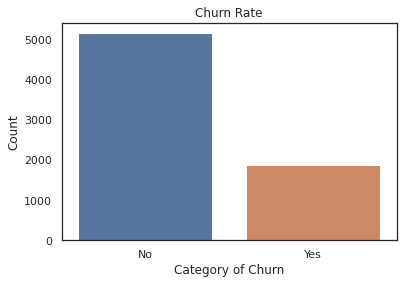

In [ ]:
ax = sns.countplot(df['churn'])
ax.set_ylabel('Count')
ax.set_xlabel('Category of Churn')
ax.set_title('Churn Rate')

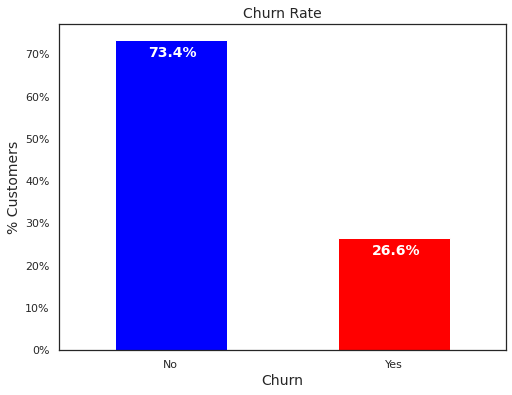

In [ ]:
colors = ['blue','red']
ax = (df['churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                          stacked = True,
                                                          rot = 0,
                                                          color = colors,
                                                          figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Customers by Tech Support')

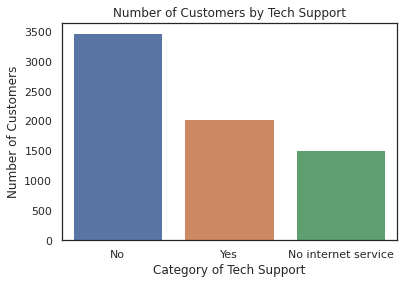

In [ ]:
ax = sns.countplot(df['techSupport'])
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Category of Tech Support')
ax.set_title('Number of Customers by Tech Support')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Customers by Multiple Lines')

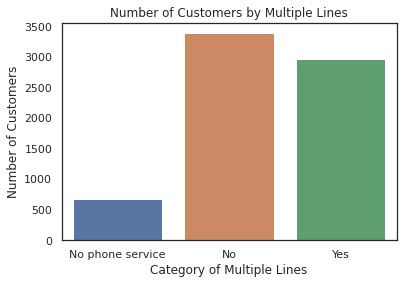

In [ ]:
ax = sns.countplot(df['multipleLines'])
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Category of Multiple Lines')
ax.set_title('Number of Customers by Multiple Lines')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Customers by Contract Type')

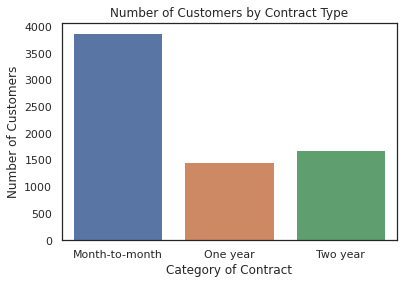

In [ ]:
ax = sns.countplot(df['contract'])
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Category of Contract')
ax.set_title('Number of Customers by Contract Type')


In [ ]:
#Convertin the dependent variable to binary
df['churn'].replace(to_replace='Yes', value=1, inplace=True)
df['churn'].replace(to_replace='No',  value=0, inplace=True)

Text(0.5, 0, 'Tenure')

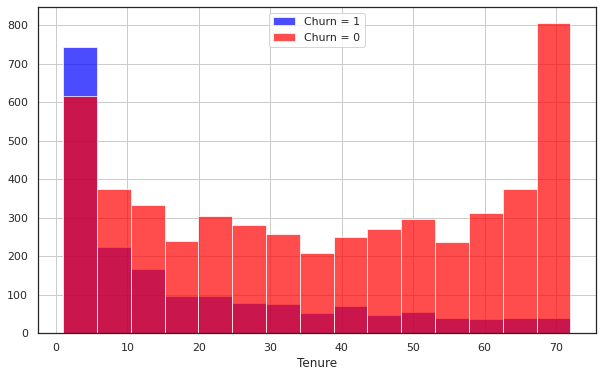

In [ ]:
plt.figure(figsize=(10,6))
df[df['churn']==1]['tenure'].hist(bins=15,color='blue',
                                  label='Churn = 1',
                                  alpha=0.7)
df[df['churn']==0]['tenure'].hist(bins=15,color='red',
                                  label='Churn = 0',
                                  alpha=0.7)
plt.legend()
plt.xlabel("Tenure")

Text(0.5, 0, 'Monthly Charges')

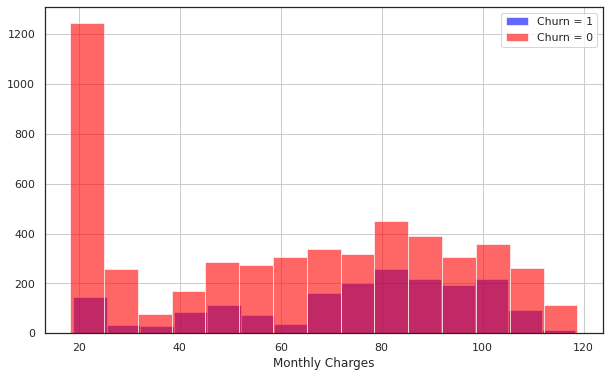

In [ ]:
plt.figure(figsize=(10,6))
df[df['churn']==1]['monthlyCharges'].hist(bins=15,color='blue',
                                  label='Churn = 1',
                                  alpha=0.6)
df[df['churn']==0]['monthlyCharges'].hist(bins=15,color='red',
                                  label='Churn = 0',
                                  alpha=0.6)
plt.legend()
plt.xlabel("Monthly Charges")

Text(0.5, 0, 'Total Charges')

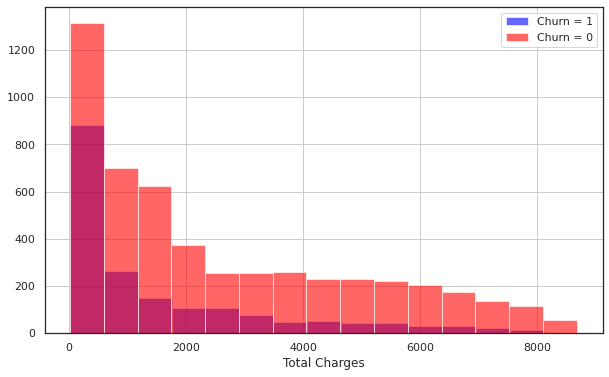

In [ ]:
plt.figure(figsize=(10,6))
df[df['churn']==1]['totalCharges'].hist(bins=15,color='blue',
                                  label='Churn = 1',
                                  alpha=0.6)
df[df['churn']==0]['totalCharges'].hist(bins=15,color='red',
                                  label='Churn = 0',
                                  alpha=0.6)
plt.legend()
plt.xlabel("Total Charges")

In [ ]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,churn,tenure,monthlyCharges,totalCharges,multipleLines_No,multipleLines_No phone service,multipleLines_Yes,techSupport_No,techSupport_No internet service,techSupport_Yes,contract_Month-to-month,contract_One year,contract_Two year
0,0,1,29.85,29.85,0,1,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0
2,1,2,53.85,108.15,1,0,0,1,0,0,1,0,0
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,1,0
4,1,2,70.70,151.65,1,0,0,1,0,0,1,0,0


Text(0.5, 1.0, "Correlation of Features with Customer's Churn")

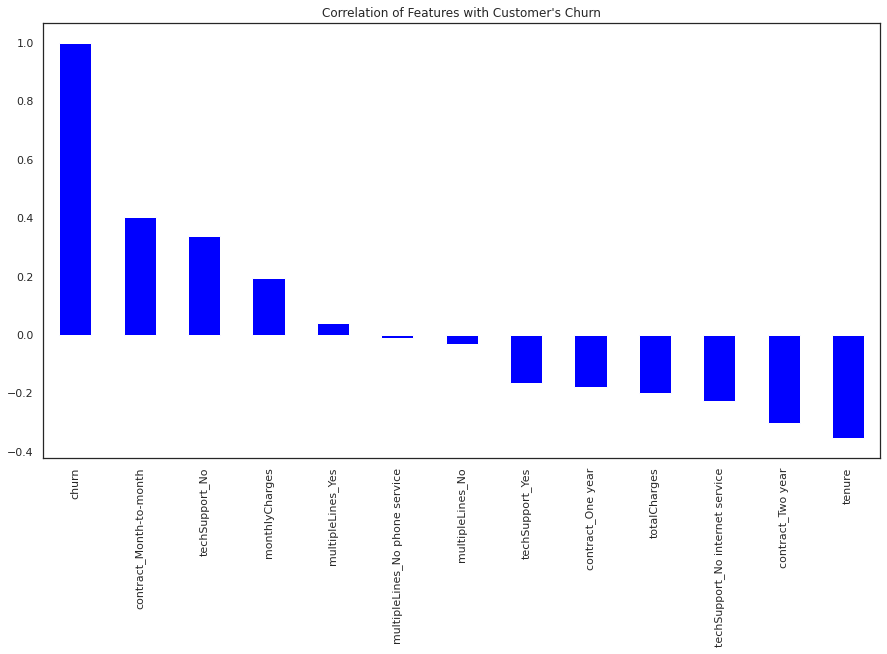

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar',color="blue")
plt.title("Correlation of Features with Customer's Churn")

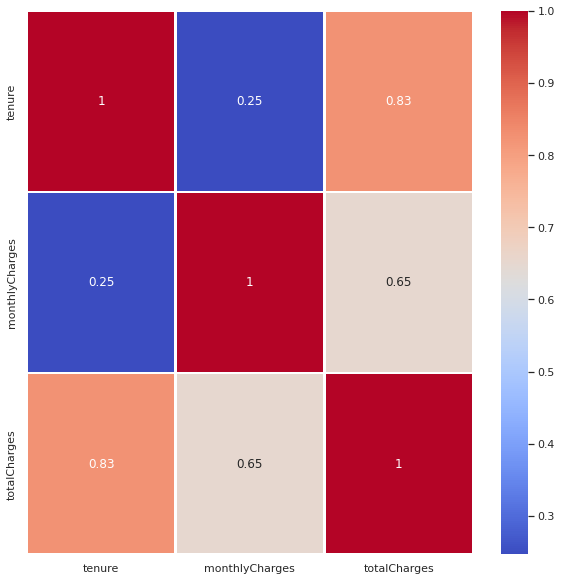

In [ ]:
#HEATMAP PLOT TO CHECK AND DROP CORRELATION VARIABLES IF ANY
df_corr = df.drop('churn', axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", linecolor="white", linewidth=1.5)

PREPROCESSING

In [ ]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df_dummies))
print(f"\n*************************************\n The outlier's length: {len(np.where(z>3)[0])}")


*************************************
 The outlier's length: 680


In [ ]:
#Removing the Outliers
outliers = list(set(np.where(z > 3)[0]))
new_data = df_dummies.drop(outliers,axis = 0)
len(new_data)

6352

In [ ]:
#Getting the features(i.e. X) and target (i.e. y)values
X = new_data.drop("churn", axis=1)
y=new_data["churn"].values

#Scaling the X features
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
X.head()

,tenure,monthlyCharges,totalCharges,multipleLines_No,multipleLines_No phone service,multipleLines_Yes,techSupport_No,techSupport_No internet service,techSupport_Yes,contract_Month-to-month,contract_One year,contract_Two year
0,0.464789,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.014085,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.014085,0.521891,0.015330,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.098592,0.809950,0.092511,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.295775,0.704975,0.222779,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#splitting X features into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Applying **RandomForest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
print("Accuracy of train:",rfc.score(X_train,y_train))
print("Accuracy of test:",rfc.score(X_test,y_test))

Accuracy of train: 0.9907782276203329
Accuracy of test: 0.7691500524658972


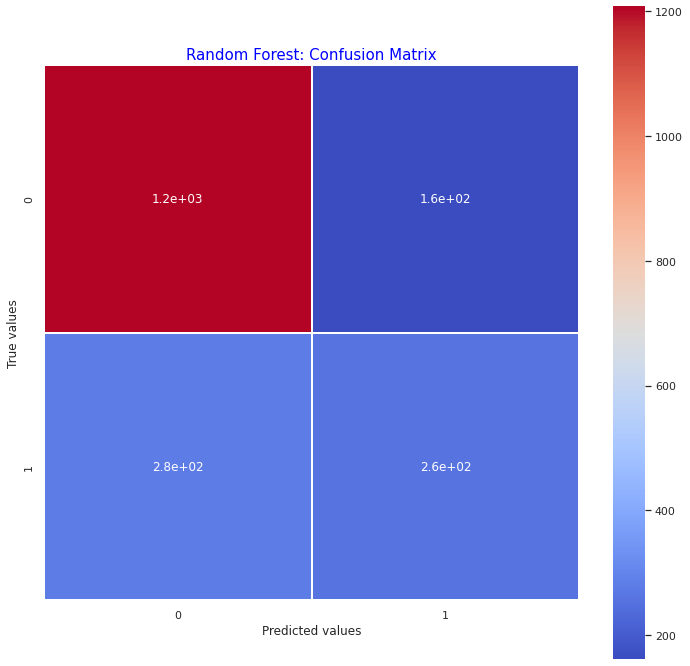

In [ ]:
#Random Forest: making prediction
pred= rfc.predict(X_test)

#Random Forest: confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,pred)
plt.figure(figsize=(12,12))
ax1 = sns.heatmap(conf_matrix, annot=True, square = True, cmap="coolwarm", linecolor="white", linewidth="1")
ax1.set_xlabel("Predicted values")
ax1.set_ylabel("True values")
ax1.set_title("Random Forest: Confusion Matrix", fontsize=15, color="blue")
plt.show()

In [ ]:
#Random Forest: classification
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1370
           1       0.61      0.48      0.54       536

    accuracy                           0.77      1906
   macro avg       0.71      0.68      0.69      1906
weighted avg       0.76      0.77      0.76      1906



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
rfc_accuracy = accuracy_score(y_test, pred)
rfc_recall = recall_score(y_test, pred)
rfc_precision = precision_score(y_test, pred)
rfc_f1_score = f1_score(y_test, pred)
print("Random Forest Model Evaluation metrics \n")
print(f"Accuracy: {rfc_accuracy}")
print(f"Recall: {rfc_recall}")
print(f"Precision: {rfc_precision}")
print(f"F1_score: {rfc_f1_score}")

Random Forest Model Evaluation metrics 

Accuracy: 0.7691500524658972
Recall: 0.48134328358208955
Precision: 0.6142857142857143
F1_score: 0.5397489539748954


IMPORTANCE OF THE FEATURES

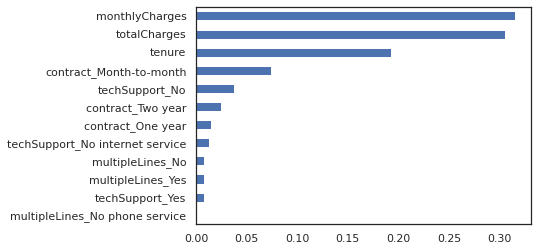

In [ ]:

importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values().plot(kind = 'barh')

In [ ]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)

from math import sqrt
rmse = sqrt(mean_squared_error(y_test, pred))

print(f"Mean Square Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")


Mean Square Error: 0.23084994753410285
Mean Absolute Error: 0.23084994753410285
Root Mean Square Error: 0.4804684667427227
